In [1]:
import numpy as np
from torchvision.models.segmentation import fcn_resnet50
import torch
import torch.nn as nn
from unet import UNet
from Fpn import FPN
from histology_dataset import histologyDataset
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split
from deeplab import deeplabv3
from pspnet import PSPNet
from torch import optim
from tqdm import tqdm
from torchvision import transforms
from losses import *
import matplotlib.pyplot as plt
from augs import *

In [5]:
dataset = histologyDataset("./histology_dataset/train/images/", "./histology_dataset/train/GT/", color=True, transform=transforms.Compose([ToTensor(), Resize(size=(256, 256))]))
dataset.classes

['AL', 'AS', 'BE', 'BL', 'CT', 'Cartilage', 'PS', 'SM', 'VL']

In [6]:
x = dataset[0]['mask']
np.unique(x.numpy())

array([0.0000000e+00, 8.1504625e-04, 1.1269790e-03, ..., 9.9858522e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

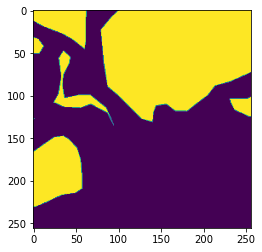

In [7]:
plt.imshow(x[0])

In [15]:
# best_model_561.1063777208328.pth -> sm+cartilage
# model_ep99_8.87753176689148.pth -> all classes
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = deeplabv3(pretrained=False, progress=True, num_classes=9)
# model = PSPNet(in_channels=3, num_classes=9, bilinear=True)
model = FPN(in_channels=3, classes=dataset.num_classes)
model.to(device=device)
model.load_state_dict(torch.load("./checkpoints/Final_model.pth", map_location=device))
model.eval()

FPN(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

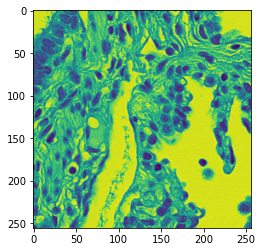

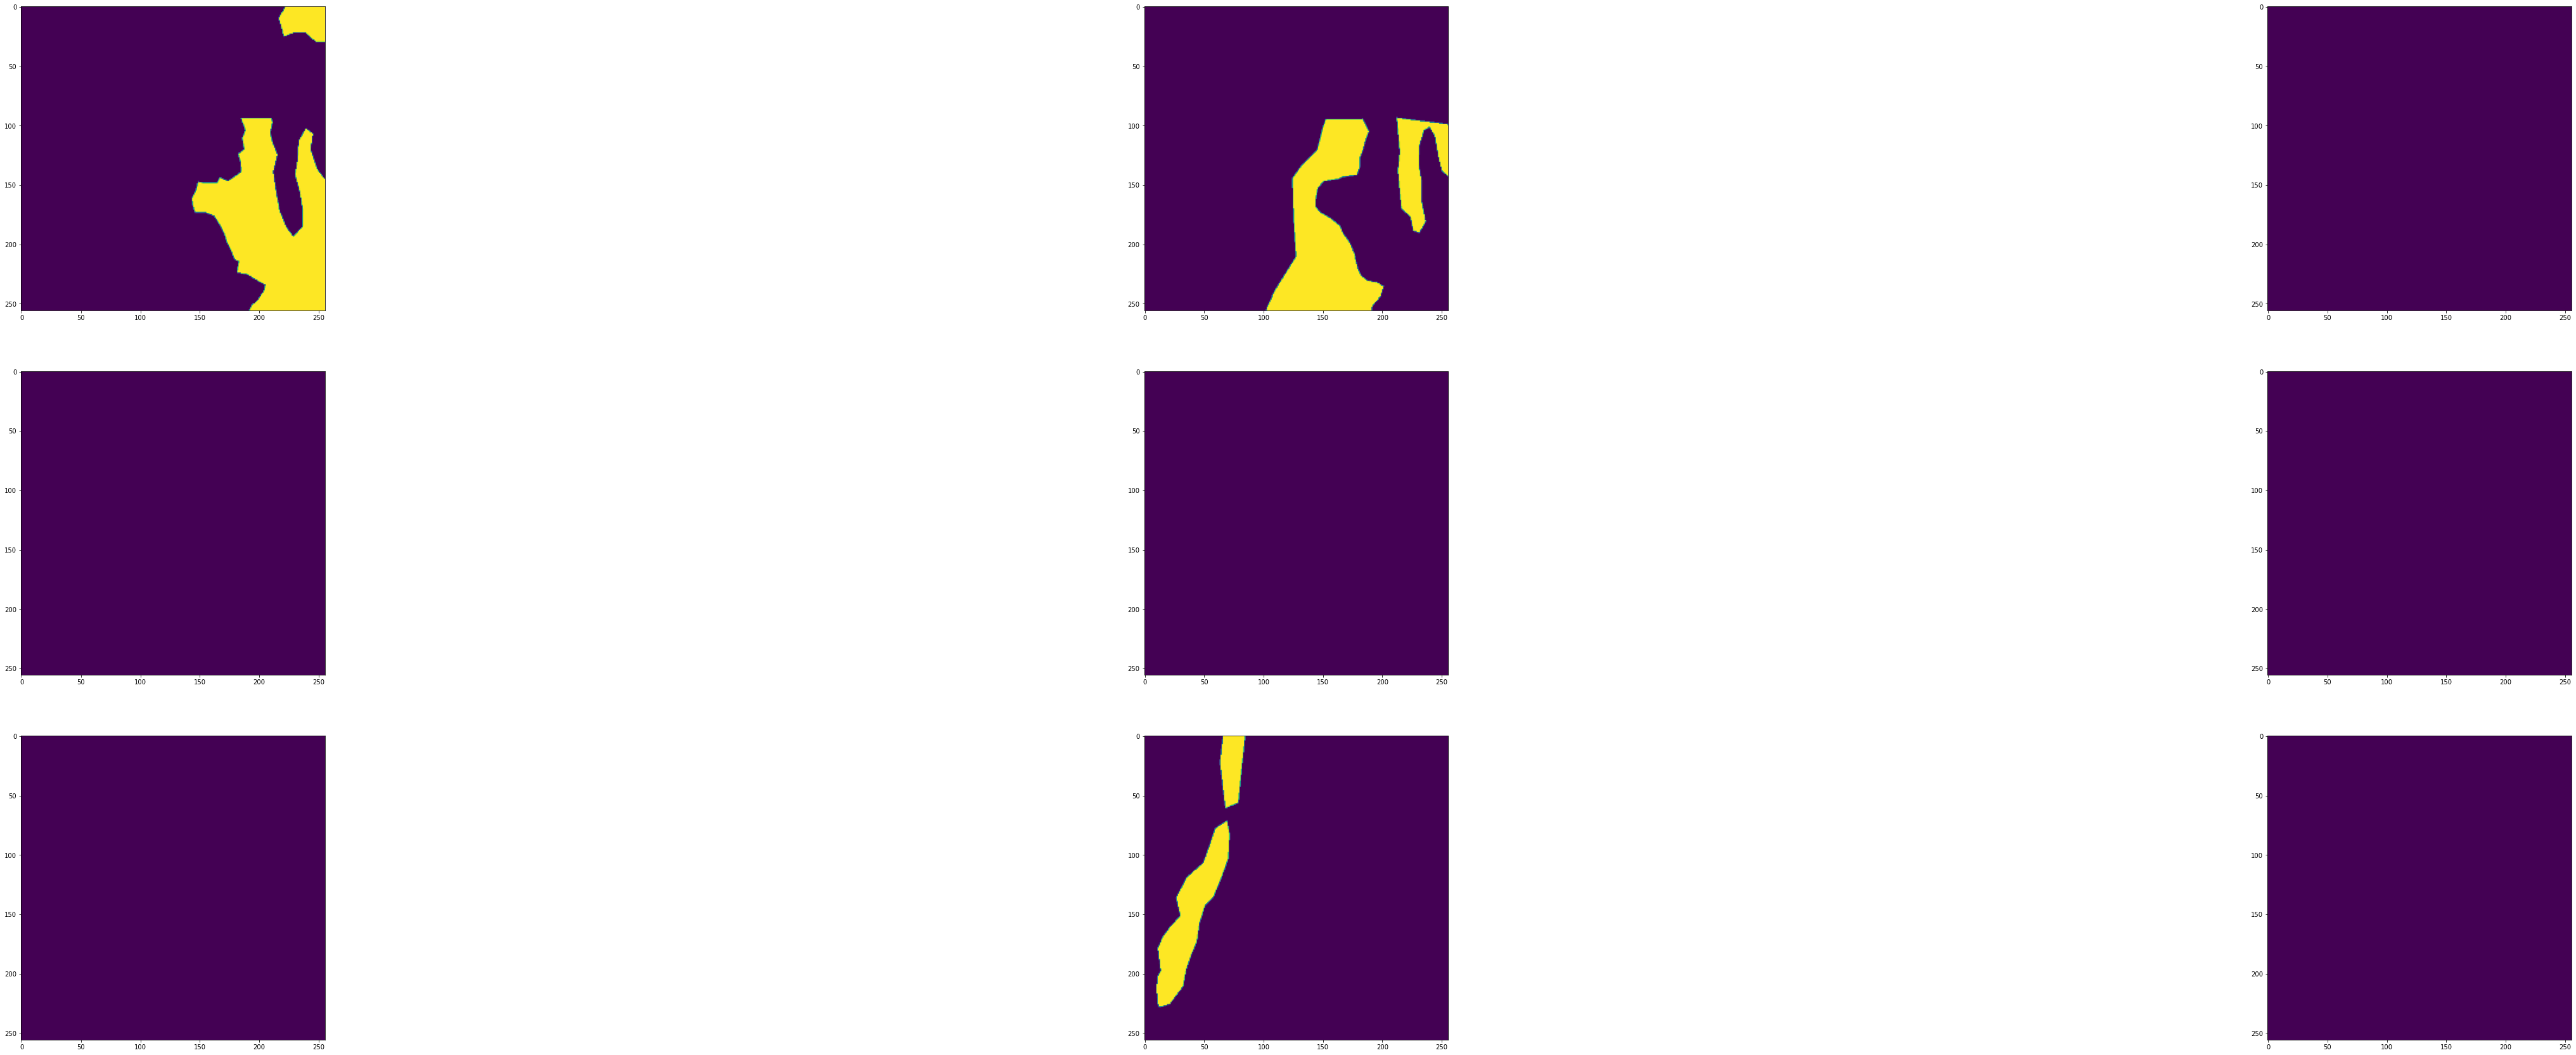

In [16]:
n = 3
im1 = dataset[n]['image']
masks = dataset[n]['mask']
plt.imshow(im1[0])
fig, axs = plt.subplots(3, 3, figsize=(90,30))
for i in range(masks.shape[0]):
    axs[int(i/3), int(i%3)].imshow(masks[i])

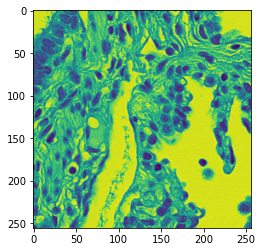

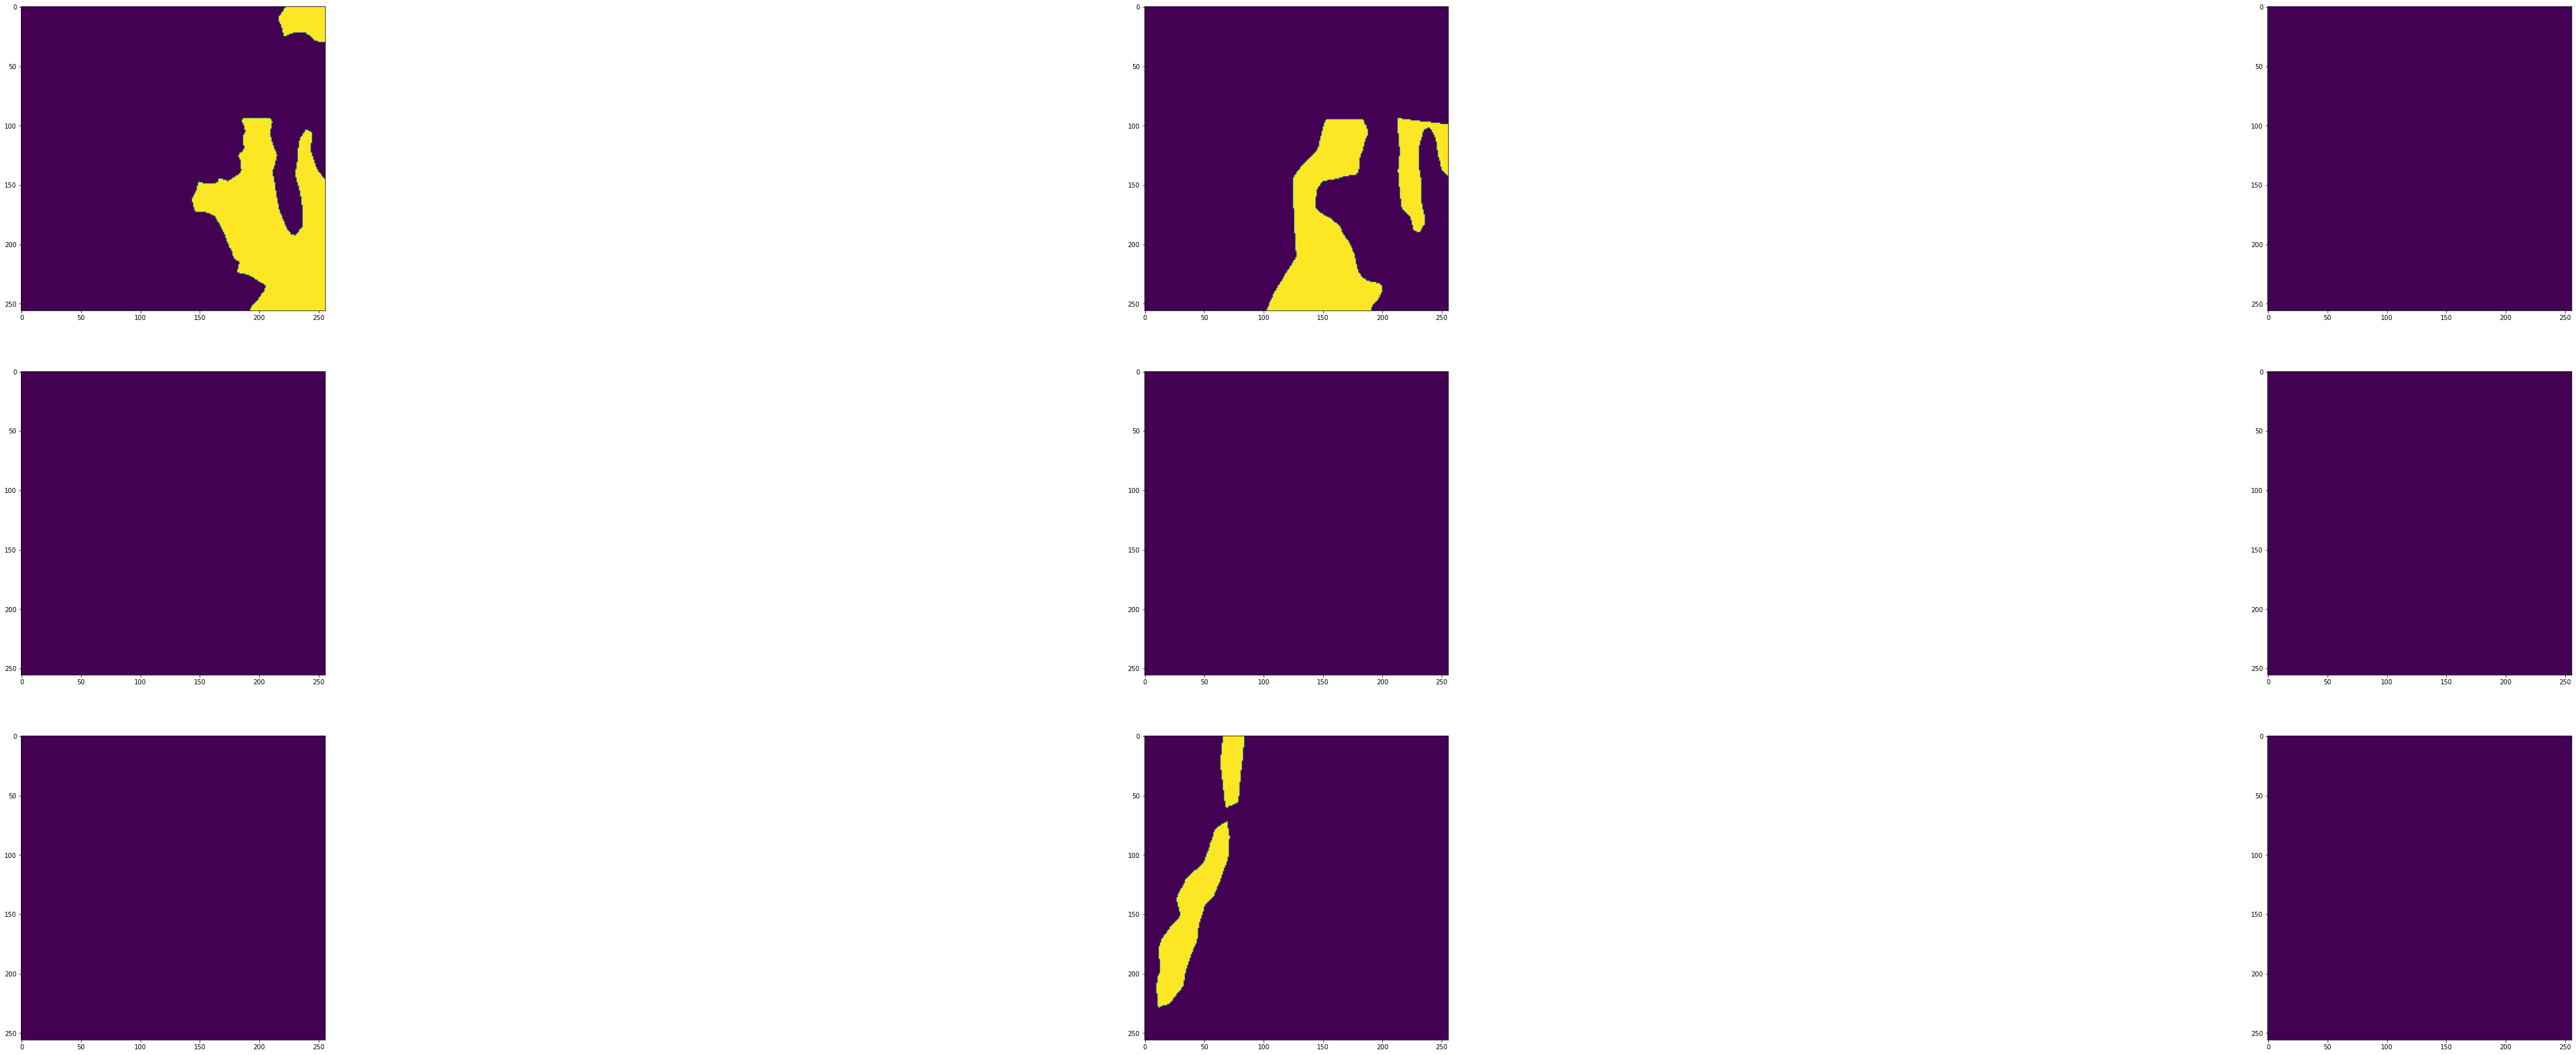

In [17]:
plt.imshow(im1[0])
im1 = torch.unsqueeze(im1, 0).to(device=device)
outs = torch.squeeze(model(im1).cpu().detach()).numpy()
fig1, axs1 = plt.subplots(3, 3, figsize=(90,30))
for i in range(outs.shape[0]):
    axs1[int(i/3), int(i%3)].imshow(outs[i]>0.5)

In [12]:
model(im1).detach().shape

torch.Size([1, 9, 256, 256])